# Spotify Music Skips Action Prediction 
The goal of the challenge is to predict the likelihood of a user skipping any given song during a listening session.

Have downloaded the Mini data from Ai crowd site and have build the model on the same below

In [52]:
# Loading Required Packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [53]:
##loading the seession data and track features data

data=pd.read_csv(r"log_mini.csv")
data_2= pd.read_csv(r'tf_mini.csv')

In [54]:
data.head(5) # Display first 5 rows of Session data

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


In [55]:
data_2.head(5) # Display first 5 rows of Track features dataset

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,...,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167880 entries, 0 to 167879
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   session_id                       167880 non-null  object
 1   session_position                 167880 non-null  int64 
 2   session_length                   167880 non-null  int64 
 3   track_id_clean                   167880 non-null  object
 4   skip_1                           167880 non-null  bool  
 5   skip_2                           167880 non-null  bool  
 6   skip_3                           167880 non-null  bool  
 7   not_skipped                      167880 non-null  bool  
 8   context_switch                   167880 non-null  int64 
 9   no_pause_before_play             167880 non-null  int64 
 10  short_pause_before_play          167880 non-null  int64 
 11  long_pause_before_play           167880 non-null  int64 
 12  hist_user_behavi

In [57]:
data.describe()

,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hour_of_day
count,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000
mean,9.325911,17.651823,0.040904,0.767602,0.146635,0.172832,0.038909,0.046259,14.193084
std,5.457638,3.422025,0.198069,0.422363,0.353742,0.378103,0.367295,0.606558,5.996243
min,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,11.000000
50%,9.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000
75%,14.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,19.000000
max,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,60.000000,151.000000,23.000000


Performing EDA (Exploratory data analysis)

In [58]:
data.describe(include=['O'])

,session_id,track_id_clean,date,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
count,167880,167880,167880,167880,167880,167880
unique,10000,50704,18,6,9,7
top,0_063a869e-4573-47f6-9404-67eb81921b1c,t_bacf06d3-9185-4183-84ea-ff0db51475ce,2018-07-15,user_collection,fwdbtn,fwdbtn
freq,20,1427,119639,67430,79912,81389


In [59]:
#For session Data

# Total number of rows and columns
data.shape
(11914, 10)
# Rows containing duplicate data
duplicate_rows = data[data.duplicated()]
print('number of duplicate rows: ', duplicate_rows.shape)
# number of duplicate rows:  (989, 10)

number of duplicate rows:  (0, 21)


In [60]:
#For Track features

# Total number of rows and columns
data_2.shape
(11914, 10)
# Rows containing duplicate data
duplicate_rows = data_2[data_2.duplicated()]
print('number of duplicate rows: ', duplicate_rows.shape)
# number of duplicate rows:  (989, 10)

number of duplicate rows:  (0, 30)


In [61]:
data.isnull().sum() # checking for null values
data_2.isnull().sum() # checking for null values

track_id                  0
duration                  0
release_year              0
us_popularity_estimate    0
acousticness              0
beat_strength             0
bounciness                0
danceability              0
dyn_range_mean            0
energy                    0
flatness                  0
instrumentalness          0
key                       0
liveness                  0
loudness                  0
mechanism                 0
mode                      0
organism                  0
speechiness               0
tempo                     0
time_signature            0
valence                   0
acoustic_vector_0         0
acoustic_vector_1         0
acoustic_vector_2         0
acoustic_vector_3         0
acoustic_vector_4         0
acoustic_vector_5         0
acoustic_vector_6         0
acoustic_vector_7         0
dtype: int64

Label Encoder for Bool and Categorical Columns

In [62]:
le = LabelEncoder()

data[data.select_dtypes(include=['bool']).columns] = data[data.select_dtypes(include=['bool']).columns].apply(le.fit_transform)
data.hist_user_behavior_reason_start=le.fit_transform(data.hist_user_behavior_reason_start)
data.hist_user_behavior_reason_end=le.fit_transform(data.hist_user_behavior_reason_end)
data['date']=data['date'].astype(object, copy=False)

In [63]:
data.dtypes # Checking datatypes after applying label encoder

session_id                         object
session_position                    int64
session_length                      int64
track_id_clean                     object
skip_1                              int64
skip_2                              int64
skip_3                              int64
not_skipped                         int64
context_switch                      int64
no_pause_before_play                int64
short_pause_before_play             int64
long_pause_before_play              int64
hist_user_behavior_n_seekfwd        int64
hist_user_behavior_n_seekback       int64
hist_user_behavior_is_shuffle       int64
hour_of_day                         int64
date                               object
premium                             int64
context_type                       object
hist_user_behavior_reason_start     int32
hist_user_behavior_reason_end       int32
dtype: object

Merging Session and Track features taking track_id into consideration

In [64]:
spotify_data = pd.merge(data, data_2, left_on='track_id_clean', right_on='track_id')

In [65]:
spotify_data = spotify_data.drop('track_id_clean', axis =1)   #dropping track_id_clean post merging of data

In [66]:
spotify_data.head(5)  # Display few rows of Spotify data

,session_id,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,0,0,0,1,0,0,0,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
1,0_00079a23-1600-486a-91bd-5208be0c745a,7,12,0,0,1,0,0,0,1,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
2,0_012b0fb4-0cc3-429f-9a78-cc6e622153fb,6,20,0,0,0,1,0,0,1,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
3,0_013cc010-c476-4ad2-8972-73449e0b2ef4,9,13,0,0,0,1,0,1,0,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
4,0_01a5f0dc-9938-48c9-92f1-c7e51f34d290,7,12,0,0,1,0,0,0,1,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826


In [67]:
#Converting Categorical columns into Numericals

spotify_data[spotify_data.select_dtypes(include=['object']).columns] = spotify_data[spotify_data.select_dtypes(include=['object']).columns].apply(le.fit_transform)

Release_Year

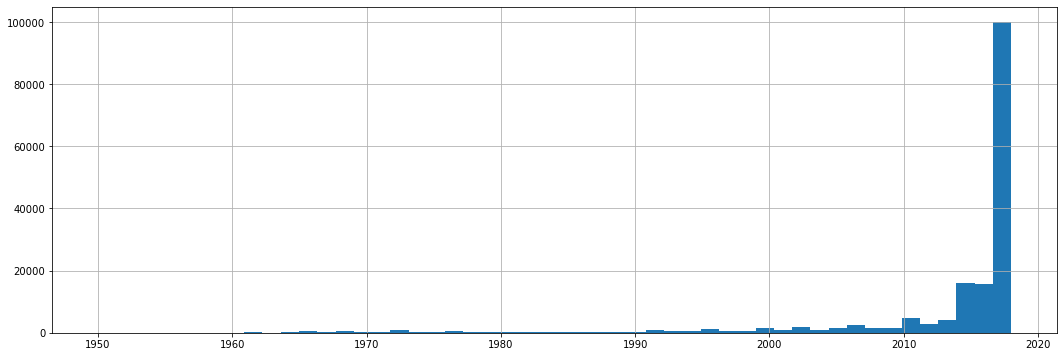

In [68]:
plt.figure(figsize=(18,6))
spotify_data['release_year'].hist(bins=50)
plt.show()

Duration of Song

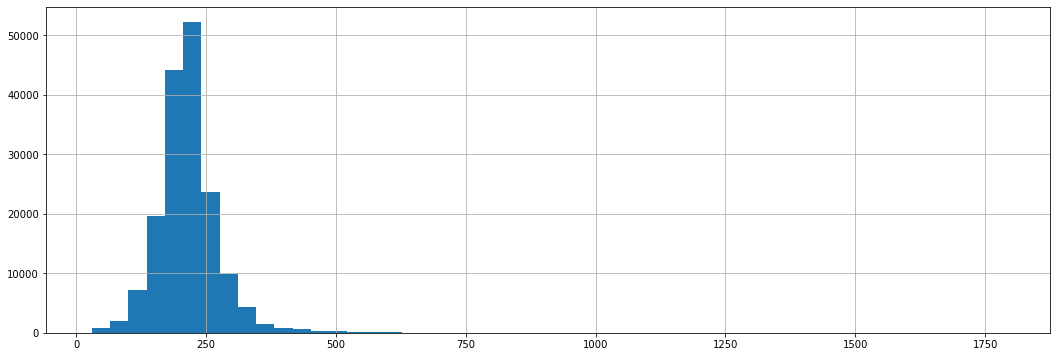

In [69]:
plt.figure(figsize=(18,6))
spotify_data['duration'].hist(bins=50)
plt.show()

Popularity of Song in US

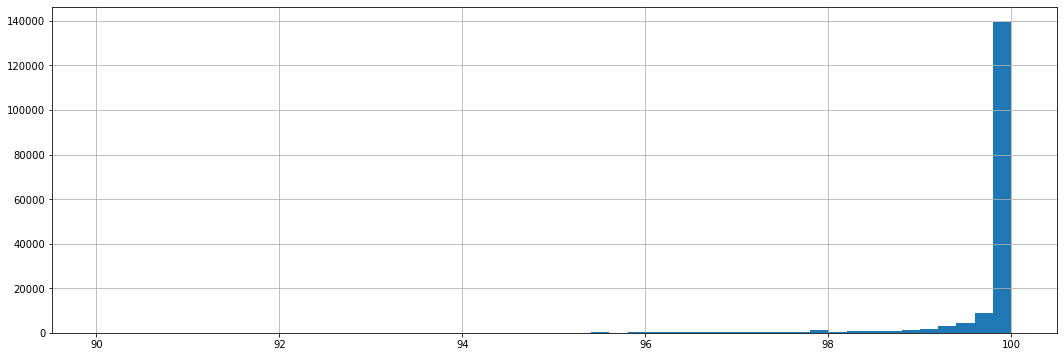

In [70]:
plt.figure(figsize=(18,6))
spotify_data['us_popularity_estimate'].hist(bins=50)
plt.show()

Acousticness Vectors

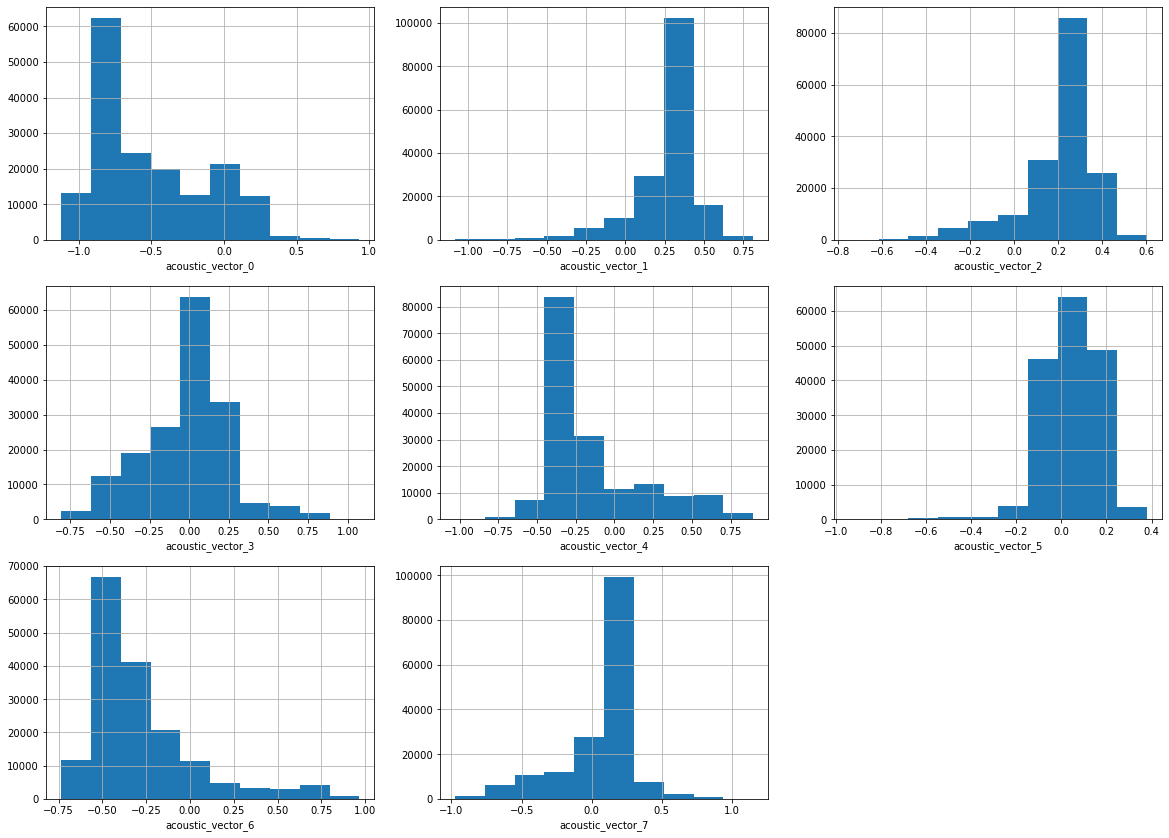

In [71]:
plt.figure(figsize=(20,30))
n = 1

for colname in ['acoustic_vector_0','acoustic_vector_1','acoustic_vector_2',
                'acoustic_vector_3','acoustic_vector_4','acoustic_vector_5',
                'acoustic_vector_6','acoustic_vector_7']:
    plt.subplot(6,3,n)
    spotify_data[colname].hist()
    plt.xlabel(colname)
    n +=1

Core-relation on Whole Data

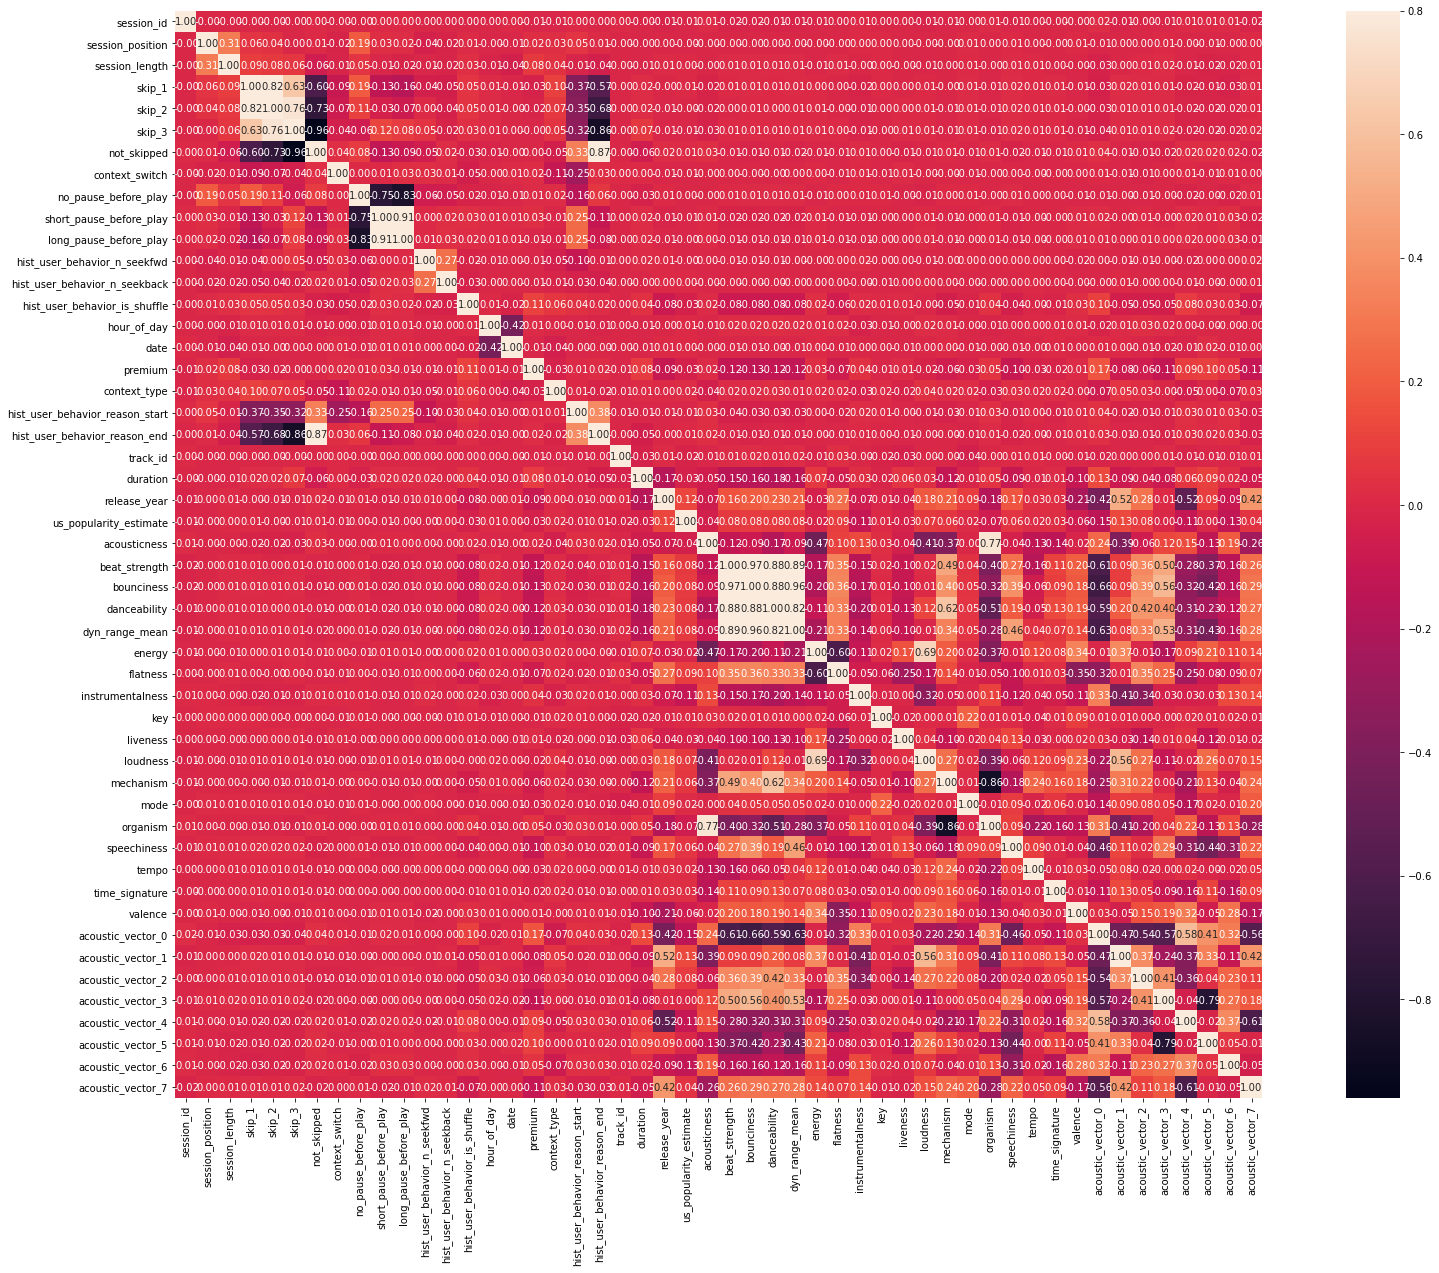

In [72]:
corrmat=spotify_data.corr()
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corrmat,cbar=True, annot=True, vmax=.8, square=True, fmt='.2f', annot_kws={'size': 10});

Identifying and Removing Outliers using Z-Score Technique

In [73]:
#Identifying Outliers
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(spotify_data))
print(z)

[[1.73233596 1.52555674 0.68619721 ... 0.27940199 0.2342252  0.5572171 ]
 [1.72401831 0.42617674 1.65160656 ... 0.27940199 0.2342252  0.5572171 ]
 [1.4426044  0.60940674 0.68619721 ... 0.27940199 0.2342252  0.5572171 ]
 ...
 [1.73231282 1.22289326 0.68619721 ... 0.30163288 0.16935541 0.14379471]
 [1.73231282 1.40612326 0.68619721 ... 0.81938021 0.87611579 0.3155531 ]
 [1.73231282 1.95581326 0.68619721 ... 0.81700741 0.96358711 0.31137185]]


In [74]:
#Setting the threshold value for removing outliers

threshold = 1.96
print(np.where(z > 1.96))

spotify_data = spotify_data[(z < 1.96).all(axis=1)]

(array([     0,      1,      1, ..., 167878, 167879, 167879], dtype=int64), array([33,  9, 10, ..., 10,  9, 10], dtype=int64))


In [75]:
spotify_data.shape

(42280, 50)

In [76]:
spotify_data.columns #Chossing Train and Target Data based on Columns

Index(['session_id', 'session_position', 'session_length', 'skip_1', 'skip_2',
       'skip_3', 'not_skipped', 'context_switch', 'no_pause_before_play',
       'short_pause_before_play', 'long_pause_before_play',
       'hist_user_behavior_n_seekfwd', 'hist_user_behavior_n_seekback',
       'hist_user_behavior_is_shuffle', 'hour_of_day', 'date', 'premium',
       'context_type', 'hist_user_behavior_reason_start',
       'hist_user_behavior_reason_end', 'track_id', 'duration', 'release_year',
       'us_popularity_estimate', 'acousticness', 'beat_strength', 'bounciness',
       'danceability', 'dyn_range_mean', 'energy', 'flatness',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mechanism', 'mode',
       'organism', 'speechiness', 'tempo', 'time_signature', 'valence',
       'acoustic_vector_0', 'acoustic_vector_1', 'acoustic_vector_2',
       'acoustic_vector_3', 'acoustic_vector_4', 'acoustic_vector_5',
       'acoustic_vector_6', 'acoustic_vector_7'],
      dtype='object

In [77]:
spotify_data= spotify_data[[c for c in spotify_data if c not in ['not_skipped']] 
       + ['not_skipped']]                                            #Pushing Target variable to end

 Train/Test/Validation Split

In [78]:
def test_train_validation(data, train_size = 0.6, valid_size = 0.2 ):
    
    train_data, test_data, validation_data = np.split(data.sample(frac = 1, random_state = random.randint(1,1e3)), [int(train_size * len(data)), int((train_size + valid_size) * len(data))])
    
    return train_data, test_data, validation_data

In [79]:
import random 
train, test, validation = test_train_validation(spotify_data)

x_train, y_train = train.iloc[:,:-1], train.iloc[:,-1]
x_test, y_test = test.iloc[:,:-1], test.iloc[:,-1]
x_valid, y_valid = validation.iloc[:,:-1], validation.iloc[:,-1]

Scaling the features using Standard Scaler

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

Model Building 

In [81]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

model = SVC()
model.fit(X_train,y_train)

SVC()

Prediction and Accuracy

In [82]:
pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))

Accuracy: 0.6156575212866604


In [68]:
#scaling the features using Standard Scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(x_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)
X_valid = scaler.transform(x_valid)

In [69]:
from sklearn.ensemble import RandomForestClassifier

my_model = RandomForestClassifier(n_estimators=5).fit(X_train, y_train)

In [70]:
pred = my_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))

Accuracy: 0.9932592242194891


In [36]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [37]:
model = SVC()
model.fit(X_train,y_train)

SVC()

In [38]:
pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))

Accuracy: 0.9947965941343425
